## Credit Card Fraud Detection - Task2

### Load transaction data

In [21]:
import pandas as pd
import numpy as np

# Read transaction data from log file
transaction_data = pd.read_csv("data/task2_data.csv", 
                               names = ["DateTime", "CardID", "TerminalID", "Amount", "Class"], 
                               parse_dates=['DateTime'],
                               dtype =  { u'CardID': str, u'TerminalID': str, u'Amount': int, u'Class': str})
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class
0,2018-06-10 04:06:00,124331003,004392,1499,0
1,2018-06-10 04:06:00,111760087,111731,1852,0
2,2018-06-10 04:06:00,117367621,159946,4939,0
3,2018-06-10 04:06:00,003439447,159908,961,1
4,2018-06-10 04:06:00,008045904,118081,416,0


### Exploratory Data Analysis

In [22]:
transaction_data.shape

(35858, 5)

In [23]:
transaction_data.isnull().values.any()

False

Transaction dataset:
Number of fraudulents = 3547
Number of not fraudulents = 32311
Fraudulent ratio = 0.0989
Fraudulent percentege = 9.89%


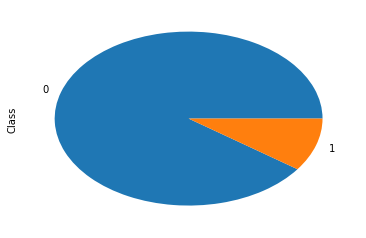

In [24]:
import matplotlib.pyplot as plt

number_of_observations = transaction_data.shape[0]
number_of_fraudulents = transaction_data[transaction_data["Class"] == '1'].shape[0]
number_of_not_fraudulents = number_of_observations - number_of_fraudulents
fraudulent_ratio = number_of_fraudulents / float(number_of_observations)
print("Transaction dataset:")
print('Number of fraudulents = {0}'.format(number_of_fraudulents))
print('Number of not fraudulents = {0}'.format(number_of_not_fraudulents))
print('Fraudulent ratio = {0:.4f}'.format(fraudulent_ratio)) 
print('Fraudulent percentege = {0:.2f}%'.format(fraudulent_ratio * 100)) 

number_of_is_attributed = transaction_data["Class"].value_counts()
number_of_is_attributed.plot(kind='pie')
plt.show()

In [25]:
normal_transaction_data = transaction_data[transaction_data["Class"] == '0']
normal_transaction_data["Amount"].describe()

count    32311.000000
mean      2648.213302
std       3943.911322
min          0.000000
25%        442.000000
50%        879.000000
75%       3578.000000
max      29984.000000
Name: Amount, dtype: float64

In [26]:
fraud_transaction_data = transaction_data[transaction_data["Class"] == '1']
fraud_transaction_data["Amount"].describe()

count     3547.000000
mean      4620.234846
std       5686.137665
min          0.000000
25%        945.000000
50%        998.000000
75%       4949.000000
max      29999.000000
Name: Amount, dtype: float64

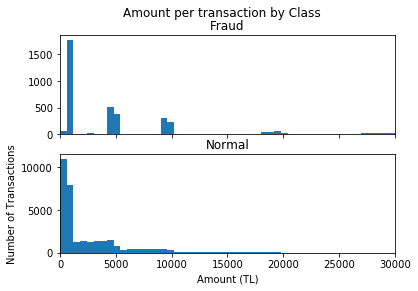

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')

bins = 50

ax1.hist(fraud_transaction_data.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal_transaction_data.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount (TL)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 30000))
plt.show();

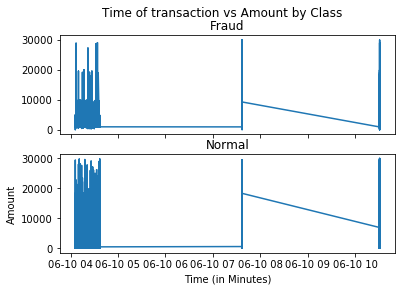

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by Class')

ax1.plot(fraud_transaction_data.DateTime, fraud_transaction_data.Amount)
ax1.set_title('Fraud')

ax2.plot(normal_transaction_data.DateTime, normal_transaction_data.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Minutes)')
plt.ylabel('Amount')
plt.show()

### Feature Extraction

In [29]:
# Parse Datetime column 

# Get year
transaction_data['year'] = transaction_data['DateTime'].dt.year.astype('uint16')

# Get month
transaction_data['month'] = transaction_data['DateTime'].dt.month.astype('uint8')

# Get day
transaction_data['day'] = transaction_data['DateTime'].dt.day.astype('uint8')

# Get hour
transaction_data['hour'] = transaction_data['DateTime'].dt.hour.astype('uint8')

# Get minute
transaction_data['minute'] = transaction_data['DateTime'].dt.minute.astype('uint8')

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6


In [30]:
# Parse CardID column

# Get kind feature
# Debit = 0
# Credit = 1
transaction_data['CardKind'] = transaction_data['CardID'].str[0]

# Get limit feature
# Debit - max daily transaction (1000 TL) = 0
# Credit - monthly limit (5000 TL) = 1
# Credit - monthly limit (10000 TL) = 2
# Credit - monthly limit (20000 TL) = 3
# Credit - monthly limit (30000 TL) = 4
transaction_data['CardLimit'] = transaction_data['CardID'].str[1]

# Get home location feature
# International = 00
# State/Province = 01 ... 80
transaction_data['CardHomeLocation'] = transaction_data['CardID'].str.slice(2,4)

# Get customer no
transaction_data['CustomerNo'] = transaction_data['CardID'].str.slice(4,9)

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,1,2,43,31003
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,1,1,17,60087
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,1,1,73,67621
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,0,0,34,39447
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,0,0,80,45904


In [31]:
# Parse TerminalID column

# Get kind feature
# ATM = 0
# POS = 1
transaction_data['TerminalKind'] = transaction_data['TerminalID'].str[0]

# Get merchant category feature
# ATM - Undefined = 0
# POS - Business type = 1 ... 5
transaction_data['TerminalMerchant'] = transaction_data['TerminalID'].str[1]

# Get location feature
# International = 00
# State/Province = 01 ... 80
# Internet = 99
transaction_data['TerminalLocation'] = transaction_data['TerminalID'].str.slice(2,4)

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,1,2,43,31003,0,0,43
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,1,1,17,60087,1,1,17
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,1,1,73,67621,1,5,99
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,0,0,34,39447,1,5,99
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,0,0,80,45904,1,1,80


In [32]:
transaction_data['SameLocation'] = transaction_data.apply(lambda x : 1 if x["CardHomeLocation"] == x["TerminalLocation"] else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,1,2,43,31003,0,0,43,1
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,1,1,17,60087,1,1,17,1
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,1,1,73,67621,1,5,99,0
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,0,0,34,39447,1,5,99,0
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,0,0,80,45904,1,1,80,1


In [33]:
transaction_data["InternationalTransaction"] = transaction_data.apply(lambda x : 1 if x["TerminalLocation"] == "00" else 0, axis=1)
transaction_data["OnlineTransaction"] = transaction_data.apply(lambda x : 1 if x["TerminalLocation"] == "99" else 0, axis=1)
transaction_data["LocalTransaction"] = transaction_data.apply(lambda x : 1 if x["InternationalTransaction"] == 0 and x["OnlineTransaction"] == 0 else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,...,2,43,31003,0,0,43,1,0,0,1
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,...,1,17,60087,1,1,17,1,0,0,1
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,...,1,73,67621,1,5,99,0,0,1,0
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,...,0,34,39447,1,5,99,0,0,1,0
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,...,0,80,45904,1,1,80,1,0,0,1


In [15]:
normal_transaction_data = transaction_data[transaction_data["Class"] == "0"]
mean_amount_normal_transaction = normal_transaction_data["Amount"].mean()
transaction_data['OverAverageAmount'] = np.where(transaction_data["Amount"] > mean_amount_normal_transaction, 1, 0)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,...,43,31003,0,0,43,1,0,0,1,0
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,...,17,60087,1,1,17,1,0,0,1,0
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,...,73,67621,1,5,99,0,0,1,0,1
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,...,34,39447,1,5,99,0,0,1,0,0
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,...,80,45904,1,1,80,1,0,0,1,0


In [16]:
mean_amount_normal_transaction_by_kind = normal_transaction_data.groupby("TerminalKind")["Amount"].apply(lambda x: np.mean(x))
transaction_data['OverAverageKindAmount'] = transaction_data.apply(lambda x : 1 if x["Amount"] > mean_amount_normal_transaction_by_kind[x["TerminalKind"]] else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageKindAmount
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,...,31003,0,0,43,1,0,0,1,0,0
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,...,60087,1,1,17,1,0,0,1,0,0
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,...,67621,1,5,99,0,0,1,0,1,1
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,...,39447,1,5,99,0,0,1,0,0,0
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,...,45904,1,1,80,1,0,0,1,0,0


In [36]:
normal_transaction_data = transaction_data[transaction_data["Class"] == "0"]
mean_amount_normal_transaction_by_merchant = normal_transaction_data.groupby("TerminalMerchant")["Amount"].apply(lambda x: np.mean(x))
transaction_data['OverAverageMerchantAmount'] = transaction_data.apply(lambda x : 1 if x["Amount"] > mean_amount_normal_transaction_by_merchant[x["TerminalMerchant"]] else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageMerchantAmount
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,...,43,31003,0,0,43,1,0,0,1,0
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,...,17,60087,1,1,17,1,0,0,1,0
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,...,73,67621,1,5,99,0,0,1,0,1
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,...,34,39447,1,5,99,0,0,1,0,0
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,...,80,45904,1,1,80,1,0,0,1,0


In [18]:
mean_amount_normal_transaction_by_location = normal_transaction_data.groupby("TerminalLocation")["Amount"].apply(lambda x: np.mean(x))
transaction_data['OverAverageLocationAmount'] = transaction_data.apply(lambda x : 1 if x["Amount"] > mean_amount_normal_transaction_by_location[x["TerminalLocation"]] else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageKindAmount,OverAverageMerchantAmount,OverAverageLocationAmount
0,2018-06-10 04:06:00,124331003,004392,1499,0,2018,6,10,4,6,...,0,43,1,0,0,1,0,0,0,0
1,2018-06-10 04:06:00,111760087,111731,1852,0,2018,6,10,4,6,...,1,17,1,0,0,1,0,0,0,0
2,2018-06-10 04:06:00,117367621,159946,4939,0,2018,6,10,4,6,...,5,99,0,0,1,0,1,1,1,1
3,2018-06-10 04:06:00,003439447,159908,961,1,2018,6,10,4,6,...,5,99,0,0,1,0,0,0,0,0
4,2018-06-10 04:06:00,008045904,118081,416,0,2018,6,10,4,6,...,1,80,1,0,0,1,0,0,0,0


In [37]:
credit_card_transaction_data = transaction_data[transaction_data["CardKind"] == "1"]
credit_card_transaction_data = credit_card_transaction_data.drop(["CardID", "TerminalID"], axis=1)
print(credit_card_transaction_data.shape)
credit_card_transaction_data.head()

(17992, 20)


,DateTime,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageMerchantAmount
0,2018-06-10 04:06:00,1499,0,2018,6,10,4,6,1,2,43,31003,0,0,43,1,0,0,1,0
1,2018-06-10 04:06:00,1852,0,2018,6,10,4,6,1,1,17,60087,1,1,17,1,0,0,1,0
2,2018-06-10 04:06:00,4939,0,2018,6,10,4,6,1,1,73,67621,1,5,99,0,0,1,0,1
5,2018-06-10 04:06:00,4616,1,2018,6,10,4,6,1,1,65,49453,0,0,65,1,0,0,1,1
7,2018-06-10 04:06:00,2447,0,2018,6,10,4,6,1,1,22,39015,1,5,12,0,0,0,1,0


In [38]:
credit_card_transaction_data.to_csv('data/task3_data.csv', sep=',', index=False)